In [1]:
from python_files.import_libs import *
from python_files.predict import *

%matplotlib inline

In [2]:
# Load the train data
sales_data = pd.read_csv('data/train.csv')

In [3]:
# Replace all datas for numeric datas
le = preprocessing.LabelEncoder()

sales_data['store'] = le.fit_transform(sales_data['store'])

sales_data.info()
sales_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int32 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int32(1), int64(2), object(1)
memory usage: 24.4+ MB


,date,store,item,sales
0,01/01/2015,0,1,2
1,01/02/2015,0,1,5
2,01/03/2015,0,1,1
3,01/04/2015,0,1,4
4,01/05/2015,0,1,1


In [4]:
# Sales per month
month_df = sales_data.copy()
print(month_df)
# Set the date time for month_df
month_df.date = pd.to_datetime(month_df.date,errors='coerce')
# groups data by month and sums as occurrences
month_df = month_df.groupby(pd.Grouper(key='date', freq='1M',axis='index')).sum()
# Set the timestamp for month and year with day 01
month_df.index = month_df.index.strftime('%Y-%m-01')
# Drop the columns 'store' and 'item'
month_df = month_df.drop(columns = ['store', 'item'])
month_df

              date  store  item  sales
0       01/01/2015      0     1      2
1       01/02/2015      0     1      5
2       01/03/2015      0     1      1
3       01/04/2015      0     1      4
4       01/05/2015      0     1      1
...            ...    ...   ...    ...
912995  12/27/2019      1    50     18
912996  12/28/2019      1    50     20
912997  12/29/2019      1    50     16
912998  12/30/2019      1    50     17
912999  12/31/2019      1    50     15

[913000 rows x 4 columns]


,sales
date,
2015-01-01,46486
2015-02-01,41850
2015-03-01,46077
2015-04-01,45094
2015-05-01,46521
2015-06-01,44998
2015-07-01,46626
2015-08-01,46560
2015-09-01,44835


In [5]:
# The duration of Dataset
# Set the date time for sales_data
sales_data.date = pd.to_datetime(sales_data.date,errors='coerce')
# calculate the minimum maximum the minus
number_days = sales_data.date.max() - sales_data.date.min()
# divide the result by the number of days in a year
number_years = number_days.days / 365
print(number_days.days, 'days')
print(number_years, 'years')

1825 days
5.0 years


[Text(0.5, 0, 'Sales Per day'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Sales Per Day')]

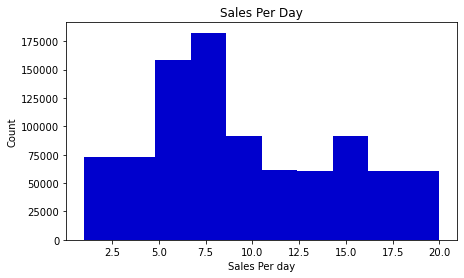

In [6]:
# Plot of sales per day
fig, ax = plt.subplots(figsize=(7,4))
plt.hist(sales_data.sales, color='mediumblue')
    
ax.set(xlabel = "Sales Per day",
        ylabel = "Count",
        title = "Sales Per Day")

C:\Users\mathe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


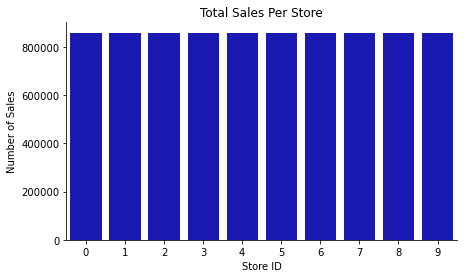

In [14]:
# Plot of sales per store
for_store = sales_data.groupby('store')['sales'].sum().reset_index()
    
fig, ax = plt.subplots(figsize=(7,4))
sns.barplot(for_store.store, for_store.sales, color='mediumblue')
    
ax.set(xlabel = "Store ID",
       ylabel = "Number of Sales",
       title = "Total Sales Per Store")
    
sns.despine()

In [8]:
# Average monthly sales overall
avg_sales = month_df.sales.mean()
print(avg_sales)

142936.55


C:\Users\mathe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mathe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


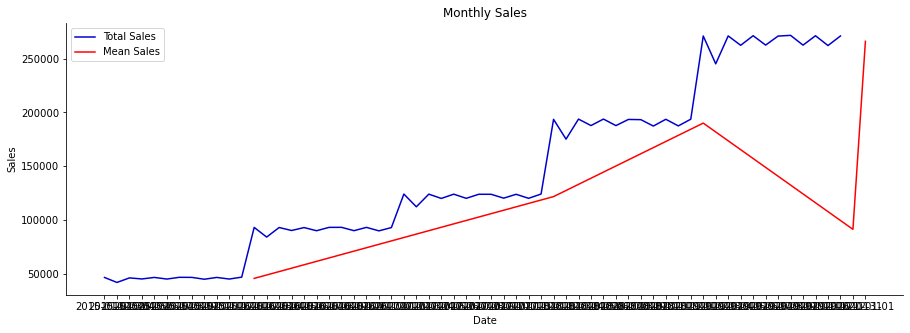

In [9]:
# Plot the graph before the diff transformation
#Determining Stationary
fig, ax = plt.subplots(figsize=(15,5))
# Plot the primary graph with the month sales
sns.lineplot('date', 'sales', data=month_df, ax=ax, color='mediumblue', label='Total Sales')

# Copy and set the date time for date_grouped
date_grouped = month_df.copy()
date_grouped.index = pd.to_datetime(date_grouped.index, errors='coerce')

# groups the years for the first day of the month with the 'AS' parameter
date_grouped = date_grouped.groupby(pd.Grouper(level=0, freq='AS')).mean().reset_index()

# Set the timestamp
date_grouped.date = date_grouped.date.dt.strftime('%Y-%m-%d')

# Set de date time for the result and format the date
date_grouped.date = pd.to_datetime(date_grouped.date, format='%Y-%m-%d', errors='coerce')

# Calculate the date_grouped with the timedelta for 365 days and format the result for timestamp
date_count = date_grouped.date + pd.Timedelta(days=365)
date_count = date_count.dt.strftime('%Y-%m-%d')

# Plot de graph with the date_count and the date_grouped results
sns.lineplot(date_count, 'sales', data=date_grouped, ax=ax, color='red', label='Mean Sales')  

ax.set(xlabel = "Date", ylabel = "Sales", title = 'Monthly Sales')

sns.despine()

In [10]:
# turning into stationary graph
stationary = month_df.copy()
stationary['sales_diff'] = stationary.sales.diff()
stationary = stationary.dropna()
# Save the information for one csv file
stationary.to_csv('data/stationary_df.csv')

C:\Users\mathe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mathe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


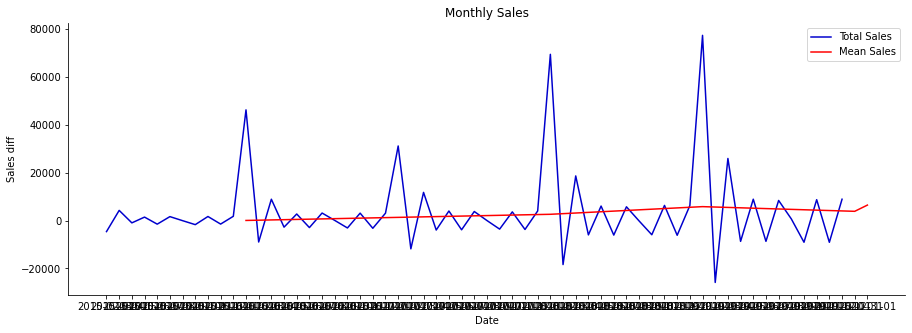

In [11]:
# Plot the graph stationary after the transformation
#Determining Stationary
fig, ax = plt.subplots(figsize=(15,5))
# Plot the primary graph with the month sales
sns.lineplot('date', 'sales_diff', data=stationary, ax=ax, color='mediumblue', label='Total Sales')

# Copy and set the date time for date_grouped
date_grouped_stacionary = stationary.copy()
date_grouped_stacionary.index = pd.to_datetime(date_grouped_stacionary.index, errors='coerce')

# groups the years for the first day of the month with the 'AS' parameter
date_grouped_stacionary = date_grouped_stacionary.groupby(pd.Grouper(level=0, freq='AS')).mean().reset_index()

# Set the timestamp
date_grouped_stacionary.date = date_grouped_stacionary.date.dt.strftime('%Y-%m-%d')

# Set de date time for the result and format the date
date_grouped_stacionary.date = pd.to_datetime(date_grouped_stacionary.date, format='%Y-%m-%d', errors='coerce')

# Calculate the date_grouped with the timedelta for 365 days and format the result for timestamp
date_count = date_grouped_stacionary.date + pd.Timedelta(days=365)
date_count = date_count.dt.strftime('%Y-%m-%d')

# Plot de graph with the date_count and the date_grouped results
sns.lineplot(date_count, 'sales_diff', data=date_grouped_stacionary, ax=ax, color='red', label='Mean Sales')  

ax.set(xlabel = "Date", ylabel = "Sales diff", title = 'Monthly Sales')

sns.despine()

In [12]:
# Preparing dataset modeling
stationary = stationary.reset_index()
supervised = stationary.copy()
    
#create column for each lag
for x in range(1,13):
    supervised['lag_' + str(x)] = supervised['sales_diff'].shift(x)
    
#drop null values
supervised = supervised.dropna().reset_index(drop=True)

supervised.to_csv('data/model_df.csv', index=False)

print(supervised)

          date   sales  sales_diff    lag_1    lag_2    lag_3    lag_4  \
0   2016-02-01   84047     -8985.0  46251.0   1761.0  -1492.0   1677.0   
1   2016-03-01   92943      8896.0  -8985.0  46251.0   1761.0  -1492.0   
2   2016-04-01   90167     -2776.0   8896.0  -8985.0  46251.0   1761.0   
3   2016-05-01   92891      2724.0  -2776.0   8896.0  -8985.0  46251.0   
4   2016-06-01   89939     -2952.0   2724.0  -2776.0   8896.0  -8985.0   
5   2016-07-01   93064      3125.0  -2952.0   2724.0  -2776.0   8896.0   
6   2016-08-01   93103        39.0   3125.0  -2952.0   2724.0  -2776.0   
7   2016-09-01   89989     -3114.0     39.0   3125.0  -2952.0   2724.0   
8   2016-10-01   93068      3079.0  -3114.0     39.0   3125.0  -2952.0   
9   2016-11-01   89825     -3243.0   3079.0  -3114.0     39.0   3125.0   
10  2016-12-01   92896      3071.0  -3243.0   3079.0  -3114.0     39.0   
11  2017-01-01  124050     31154.0   3071.0  -3243.0   3079.0  -3114.0   
12  2017-02-01  112207    -11843.0  31

In [13]:
# set index for date and drop sales column
data_stationary = stationary.copy()
dt_data = data_stationary.set_index('date').drop('sales', axis=1)
# drop null and inexistents values
dt_data.dropna(axis=0)
    
# save datas on csv file
dt_data.to_csv('data/arima.csv')
    
print(dt_data)

            sales_diff
date                  
2015-02-01     -4636.0
2015-03-01      4227.0
2015-04-01      -983.0
2015-05-01      1427.0
2015-06-01     -1523.0
2015-07-01      1628.0
2015-08-01       -66.0
2015-09-01     -1725.0
2015-10-01      1677.0
2015-11-01     -1492.0
2015-12-01      1761.0
2016-01-01     46251.0
2016-02-01     -8985.0
2016-03-01      8896.0
2016-04-01     -2776.0
2016-05-01      2724.0
2016-06-01     -2952.0
2016-07-01      3125.0
2016-08-01        39.0
2016-09-01     -3114.0
2016-10-01      3079.0
2016-11-01     -3243.0
2016-12-01      3071.0
2017-01-01     31154.0
2017-02-01    -11843.0
2017-03-01     11754.0
2017-04-01     -3979.0
2017-05-01      3973.0
2017-06-01     -3879.0
2017-07-01      3766.0
2017-08-01       -10.0
2017-09-01     -3598.0
2017-10-01      3603.0
2017-11-01     -3748.0
2017-12-01      3997.0
2018-01-01     69465.0
2018-02-01    -18416.0
2018-03-01     18636.0
2018-04-01     -6014.0
2018-05-01      6038.0
2018-06-01     -6090.0
2018-07-01 